# Product Research Project using Reviews Best Buy

**Central questions:**
Which aspects of a luxurious vacuum cleaner outperform those of the cheaper one?
Which features of both chosen products receive the highest number of  positive/negative/neutral feedbacks?

This notebook shows more about 1) how we clean our data, 2) how we retrieve more addtional information from our dataset, and 3)how we use query to analyze our dataset. 

**Added sections:**
- Part 1: B - Data cleaning, C - Calculate relevance rate and sentiment scores
- Part 2: Data Analysis

---

### A. Data scraping

In this first part, we use `requests` and `Xpath` to mine data from the reviews page of 2 vacuum cleaners that are sold on `bestbuy.com`

In [1]:
#import neccessary Python libraries and packages
import os
import io
import sys
import importlib
import pandas as pd
from lxml import etree
import requests

htmlparser =  etree.HTMLParser() # Use a custom HTML parser to parse the response content into an XML Element

datadir = 'data'

During the mining process, we clarify `User-Agent` in order to avoid being identified as robot and being blocked from the website and store in `header` variable.

In [2]:
header = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.6.1 Safari/605.1.15"}

---

### 1. Mining process for Hoover Vacuum

**Data description:** Our first dataset, we retrieve customers reviews and relevant information from the reviews pages of Hoover Vacuum on `bestbuy.com`. The dataset has 6 columns represent 6 types of information we get from the reviews product pages: 
  - `UserID`: represents the unique ID of each customers that provided reviews for the product
  - `Time`: the time each review was posted
  - `Ratings` : ratings the customers gave for their experience with the products (out of 5)
  - `Helpful scores` : number of votes indicating that the review was helpful
  - `Unhelpful scores`: number of votes indicating that the review was unhelpful
  - `Reviews`: review text of each customer


**Data Mining Process:** 
We first retrieve data from the webpage using `requests.get`. We clarify our `User-Agent` using `headers` parameter in `request.get` call. Since there are multiple pages exhibiting customers reviews for Hoover vacuum, we use `for loop` to traverse through all the review pages. We store response for each page as `response1` and append them into the `pages1` list. On each review page, we use `xpath` to gather information needed and store the data in corresponding lists. 

In [3]:
# Traverse through HTML of multiple review pages and retreive page's root
pages1 = []
for i in range (1,3):
    url = "https://www.bestbuy.com/site/reviews/hoover-windtunnel-2-whole-home-rewind-cobalt-blue-iron-ore/6138362?variant=A&skuId=6138362&page={}"
    response1 = requests.get(url.format(i), headers = header)
    pages1.append(response1) #store all page's roots in a list
    assert response1.status_code == 200


# Create different list to store differnt types of information 
rating1 = []
times1 = []
helpful1 =[]
unhelpful1 = []
userid1 = []
comment1=[]
roots1 = []

# Loop through each root we have gained from above to mine the needed data
for page in pages1:
    tree1 = etree.parse(io.BytesIO(page.content), htmlparser)
    root1 = tree1.getroot()
    roots1 += root1
    path1 = '//*[@id="reviews-accordion"]/div[1]/ul'
    bb1 = root1.xpath(path1)[0]
    r1 = bb1.xpath('.//div[1]/p/text()')
    rating1 += r1
    t1 = bb1.xpath('.//div[@class="posted-date-ownership disclaimer v-m-right-xxs"]/time/@title')
    times1 += t1
    cmt1 = bb1.xpath('//div[@class="ugc-review-body"]/p/text()')
    comment1 += cmt1
    h1 = bb1.xpath('//div[@class="feedback-display"]/button[1]/text()')
    helpful1 += h1
    uh1 = bb1.xpath('//div[@class="feedback-display"]/button[2]/text()')
    unhelpful1 += uh1
    idA = bb1.xpath('//div[@class="ugc-author v-fw-medium body-copy-lg"]/strong/text()')
    id1 = [idA[i] for i in range(len(idA)) if i % 2 == 0]
    userid1 += id1

To store the data we have mined into an `.xml` file, we loop through all the roots we have in the `roots1` list, decode, and write them in the file using `.write`.

In [4]:
for root1 in roots1:
    bestbuy1 = etree.tostring(root1, pretty_print = True).decode('utf-8')
    with open(os.path.join(datadir, 'hoover.xml'), 'w') as f1:
        f1.write(bestbuy1)

We create `DoL1` to store opur information as a dictionary of list and create a `DataFrame` from that DoL.

In [5]:
for i in range(len(userid1)):
    userid1[i] = str(userid1[i])
    times1[i] = str(times1[i])
    helpful1[i] = str(helpful1[i])
    unhelpful1[i] = str(unhelpful1[i])
    comment1[i] = str(comment1[i])
    rating1[i] = str(rating1[i])

DoL1 = {'UserID': userid1, 'Time': times1, 'Reviews': comment1,
        'Ratings': rating1, 'Helpful_scores': helpful1, 'Unhelpful_scores': unhelpful1}
len(DoL1["UserID"])

40

In [6]:
Hoover = pd.DataFrame(DoL1)
Hoover["Product_name"] = "Hoover"
Hoover.head(10)

,UserID,Time,Reviews,Ratings,Helpful_scores,Unhelpful_scores,Product_name
0,QueenAudrey,"Aug 25, 2022 1:56 PM",Im very impressed ive had my vacuum for 2 week...,Rated 5 out of 5 stars,Helpful (3),Unhelpful (0),Hoover
1,JJTargaryan,"Dec 5, 2022 8:00 PM",Excellent vacuum. Easy to break down and clean...,Rated 5 out of 5 stars,Helpful (1),Unhelpful (0),Hoover
2,Guy1,"Sep 20, 2018 5:39 PM","Great vacuum, have owned it for almost 2 month...",Rated 4 out of 5 stars,Helpful (34),Unhelpful (3),Hoover
3,Valueminded,"Jan 18, 2020 12:24 PM",I bought this bagless Hoover on sale at Best B...,Rated 3 out of 5 stars,Helpful (40),Unhelpful (13),Hoover
4,bbcustomer,"Jul 5, 2020 8:06 AM","This is great, really sucks up a lot. Perfect...",Rated 5 out of 5 stars,Helpful (15),Unhelpful (1),Hoover
5,Blessed,"Jul 6, 2021 10:08 PM","Optimum and efficient,able to maneuver and sta...",Rated 5 out of 5 stars,Helpful (8),Unhelpful (1),Hoover
6,Vega,"Nov 15, 2022 6:26 PM",The picture shows the model with the brush rol...,Rated 2 out of 5 stars,Helpful (0),Unhelpful (0),Hoover
7,AZMom,"Oct 14, 2022 3:53 PM",I had an older Hoover Wind tunnel and I loved ...,Rated 1 out of 5 stars,Helpful (2),Unhelpful (1),Hoover
8,Fuji,"Mar 19, 2022 4:50 PM",Vacuums incredibly well but poorly constructed...,Rated 3 out of 5 stars,Helpful (2),Unhelpful (0),Hoover
9,Kevin17,"Sep 17, 2019 10:22 PM",This was the best investment I could make sinc...,Rated 5 out of 5 stars,Helpful (20),Unhelpful (8),Hoover


### 2. Mining process for Dyson Vacuum

**Data description:** Our first dataset, we retrieve customers reviews and relevant information from the reviews pages of Hoover Vacuum on `bestbuy.com`. The dataset has 6 columns represent 6 types of information we get from the reviews product pages: 
  - `UserID`: represents the unique ID of each customers that provided reviews for the product
  - `Time`: the time each review was posted
  - `Ratings` : ratings the customers gave for their experience with the products (out of 5)
  - `Helpful scores` : number of votes indicating that the review was helpful
  - `Unhelpful scores`: number of votes indicating that the review was unhelpful
  - `Reviews`: review text of each customer


**Data Mining Process:** 
We first retrieve data from the webpage using `requests.get`. We clarify our `User-Agent` using `headers` parameter in `request.get` call. Since there are multiple pages exhibiting customers reviews for Hoover vacuum, we use `for loop` to traverse through all the review pages. We store response for each page as `response1` and append them into the `pages1` list. On each review page, we use `xpath` to gather information needed and store the data in corresponding lists. 

**Challenge while mining:** 
Since we don't have the right to retrieve data from _bestbuy.com_, we were blocked several times if we tried to rerun our code many times or looped through many pages at the same time. Therefore, to make sure all the code execute without error, it'd better to use `.xml` file we have created to retrieve information.

In [7]:
# Traverse through HTML of multiple review pages and retreive page's root
pages2 = []
for x in range(1,3):
    url = "https://www.bestbuy.com/site/reviews/dyson-v15-detect-cordless-vacuum-yellow-nickel/6451330?variant=A&skuId=6451330&page={}"
    response2 = requests.get(url.format(x), headers = header)
    pages2.append(response2)
    assert response2.status_code == 200

# Create different list to store differnt types of information 
rating2 = []
times2 = []
helpful2 =[]
unhelpful2 = []
userid2 = []
comment2 = []
roots2 = []

# Loop through each root we have gained from above to mine the needed data
for page in pages2:
    tree2 = etree.parse(io.BytesIO(page.content), htmlparser)
    root2 = tree2.getroot()
    roots2 += root2
    path2 = '//*[@id="reviews-accordion"]/div[1]/ul'
    bb2 = root2.xpath(path2)[0]
    r2 = bb2.xpath('.//div[1]/p/text()')
    rating2 += r2
    t2 = bb2.xpath('.//div[@class="posted-date-ownership disclaimer v-m-right-xxs"]/time/@title')
    times2 += t2
    cmt2 = bb2.xpath('//div[@class="ugc-review-body"]/p/text()')
    comment2 += cmt2
    h2 = bb2.xpath('//div[@class="feedback-display"]/button[1]/text()')
    helpful2 += h2
    uh2 = bb2.xpath('//div[@class="feedback-display"]/button[2]/text()')
    unhelpful2 += uh2
    idB = bb2.xpath('//div[@class="ugc-author v-fw-medium body-copy-lg"]/strong/text()')
    id2 = [idB[i] for i in range(len(idB)) if i % 2 == 0]
    userid2 += id2

In [8]:
for root2 in roots2:
    bestbuy2 = etree.tostring(root2, pretty_print = True).decode('utf-8')
    with open(os.path.join(datadir, 'dyson.xml'), 'w') as f2:
        f2.write(bestbuy2)

In [9]:
for i in range(len(userid2)):
    userid2[i] = str(userid2[i])
    times2[i] = str(times2[i])
    helpful2[i] = str(helpful2[i])
    unhelpful2[i] = str(unhelpful2[i])
    comment2[i] = str(comment2[i])
    rating2[i] = str(rating2[i])

DoL2 = {'UserID': userid2, 'Time': times2, 'Reviews': comment2,
        'Ratings': rating2, 'Helpful_scores': helpful2, 'Unhelpful_scores': unhelpful2}

In [10]:
Dyson = pd.DataFrame(DoL2)
Dyson["Product_name"] = "Dyson"
Dyson.head(10)

,UserID,Time,Reviews,Ratings,Helpful_scores,Unhelpful_scores,Product_name
0,btd42,"Jun 22, 2021 10:59 AM",Background: \nThis is my first dyson. I am com...,Rated 5 out of 5 stars,Helpful (31),Unhelpful (5),Dyson
1,AGK2000,"Dec 6, 2022 9:58 AM",It is an expensive vacuum we got a discount on...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson
2,LonG,"Dec 9, 2022 5:13 PM","I do laundry, dishes, you name the chore, I do...",Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson
3,bestbuy,"Dec 3, 2022 12:17 PM",First and only battery powered vacuum I’ve eve...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson
4,LPerera,"Dec 4, 2022 6:17 PM",Simply put this vacume is built so well and ca...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson
5,Goose,"Dec 9, 2022 3:33 PM","Best vacuum every, very strong and db levels a...",Rated 5 out of 5 stars,Helpful (1),Unhelpful (0),Dyson
6,Karim,"Dec 2, 2022 4:41 PM",The best cordless dyson vacuum yet! From the s...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson
7,Roxie,"Dec 8, 2022 5:10 PM",I love this vacuum but I will say it is heavie...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson
8,User,"Nov 9, 2022 3:48 PM",Great for picking up dust an animal here. ￼The...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson
9,Juanber44,"Dec 4, 2022 9:32 AM",Just what i was expecting when i saw it for fi...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson


**Data analysis plan:**
We plan to use ratings to generally assess the customers experience with the products. Other information such as `UserID`, `Time` will be used as independent variables to identify each unique review. In this project, to answer our central questions, we use our reviews to subjectively investigate wth aspects of the products receive the most positive/negative feedbacks using the Contextual Semantic Search (CSS) library. 

In [11]:
Dyson.head(10)

,UserID,Time,Reviews,Ratings,Helpful_scores,Unhelpful_scores,Product_name
0,btd42,"Jun 22, 2021 10:59 AM",Background: \nThis is my first dyson. I am com...,Rated 5 out of 5 stars,Helpful (31),Unhelpful (5),Dyson
1,AGK2000,"Dec 6, 2022 9:58 AM",It is an expensive vacuum we got a discount on...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson
2,LonG,"Dec 9, 2022 5:13 PM","I do laundry, dishes, you name the chore, I do...",Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson
3,bestbuy,"Dec 3, 2022 12:17 PM",First and only battery powered vacuum I’ve eve...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson
4,LPerera,"Dec 4, 2022 6:17 PM",Simply put this vacume is built so well and ca...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson
5,Goose,"Dec 9, 2022 3:33 PM","Best vacuum every, very strong and db levels a...",Rated 5 out of 5 stars,Helpful (1),Unhelpful (0),Dyson
6,Karim,"Dec 2, 2022 4:41 PM",The best cordless dyson vacuum yet! From the s...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson
7,Roxie,"Dec 8, 2022 5:10 PM",I love this vacuum but I will say it is heavie...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson
8,User,"Nov 9, 2022 3:48 PM",Great for picking up dust an animal here. ￼The...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson
9,Juanber44,"Dec 4, 2022 9:32 AM",Just what i was expecting when i saw it for fi...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson


---

**Data citation:**

Bestbuy.com. Dyson - V15 Detect Cordless Vacuum - Yellow/Nickel. https://www.bestbuy.com/site/dyson-v15-detect-cordless-vacuum-yellow-nickel/6451330.p?skuId=6451330

Bestbuy.com. Hoover WindTunnel 2 Whole Home Rewind - Cobalt Blue & Iron Ore. https://www.bestbuy.com/site/reviews/hoover-windtunnel-2-whole-home-rewind-cobalt-blue-iron-ore/6138362?variant=A&skuId=6138362



---

### B. Data cleaning

Break down `Time` column into date, time, year. Calculate positivity scores 
Tokenize reviews and calculate `Similarity` scores. 

In this project,  we uses `spacy` module from `nlp` package to calculate how much relevant the reviews are to our studied features. We use `nltk` to generate the sentiment score for each review. After having similarity score we add them into our `reviews` dataset, we create a DataFrame `review_feature` by first creating LoD. 


In [12]:
reviews = pd.concat([Dyson, Hoover], axis=0, ignore_index=True)

Using `.concat` with index clarified, then `reset_index` messed up our data in `reviews` when `reviews["Reviews"][0]` prints out a `Seires` instead of a string. We tried to change the `ignore_index` and have the problem solved. 

In [13]:
reviews.tail()

,UserID,Time,Reviews,Ratings,Helpful_scores,Unhelpful_scores,Product_name
75,NJGecko,"Dec 18, 2019 8:43 AM",I bought this for a small apartment. I use it...,Rated 5 out of 5 stars,Helpful (19),Unhelpful (0),Hoover
76,Smokie,"Oct 28, 2022 9:25 PM","Very pleased with the vacuum, It replaced my ...",Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Hoover
77,Anonymous,"Nov 13, 2022 7:35 AM",I was tired of renting vacuum. I need it all i...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Hoover
78,Odavyn,"Sep 2, 2022 3:56 PM",You can never go wrong with a Hoover! Our old ...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Hoover
79,SAStef,"Dec 9, 2022 6:32 PM",It works but not as pictured. It shows as havi...,Rated 3 out of 5 stars,Helpful (0),Unhelpful (0),Hoover


#### 1. Break down `Time` column:

We break down the `Time` column in our data set so that it is easier to look up information with respect to date, exact time, month, and year. This makes our data tidier according to one of the data redflags we have learned.

In [14]:
time = []
date = []
year = []
month = []

for val0 in reviews["Time"]:
    time.append(val0[-8:])
    val0=val0[:-8]
    year.append(int(val0[-5:]))
    val0 = val0[:-5]
    date.append(val0[3:-1])
    month.append(val0[:3])
date1 = []
for val1 in date:
    if val1[-1]==',':
        date1.append(int(val1[:-1]))
    else:
        date1.append(int(val1))

reviews["Exact_time"] = time
reviews["Date"] = date1
reviews["Year"] = year
reviews["Month"] = month
reviews.pop("Time")
        
reviews.head(10)

,UserID,Reviews,Ratings,Helpful_scores,Unhelpful_scores,Product_name,Exact_time,Date,Year,Month
0,btd42,Background: \nThis is my first dyson. I am com...,Rated 5 out of 5 stars,Helpful (31),Unhelpful (5),Dyson,10:59 AM,22,2021,Jun
1,AGK2000,It is an expensive vacuum we got a discount on...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson,9:58 AM,6,2022,Dec
2,LonG,"I do laundry, dishes, you name the chore, I do...",Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson,5:13 PM,9,2022,Dec
3,bestbuy,First and only battery powered vacuum I’ve eve...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson,12:17 PM,3,2022,Dec
4,LPerera,Simply put this vacume is built so well and ca...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson,6:17 PM,4,2022,Dec
5,Goose,"Best vacuum every, very strong and db levels a...",Rated 5 out of 5 stars,Helpful (1),Unhelpful (0),Dyson,3:33 PM,9,2022,Dec
6,Karim,The best cordless dyson vacuum yet! From the s...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson,4:41 PM,2,2022,Dec
7,Roxie,I love this vacuum but I will say it is heavie...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson,5:10 PM,8,2022,Dec
8,User,Great for picking up dust an animal here. ￼The...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson,3:48 PM,9,2022,Nov
9,Juanber44,Just what i was expecting when i saw it for fi...,Rated 5 out of 5 stars,Helpful (0),Unhelpful (0),Dyson,9:32 AM,4,2022,Dec


#### 2. Edit `Ratings` column:
For `Ratings` column we only keep the actual rating that was given with the reviews.

In [15]:
rating_edited = []
for val2 in reviews['Ratings']:
    rating_edited.append(int(val2[6]))
reviews['Ratings'] = rating_edited

In [16]:
reviews.head(10)

,UserID,Reviews,Ratings,Helpful_scores,Unhelpful_scores,Product_name,Exact_time,Date,Year,Month
0,btd42,Background: \nThis is my first dyson. I am com...,5,Helpful (31),Unhelpful (5),Dyson,10:59 AM,22,2021,Jun
1,AGK2000,It is an expensive vacuum we got a discount on...,5,Helpful (0),Unhelpful (0),Dyson,9:58 AM,6,2022,Dec
2,LonG,"I do laundry, dishes, you name the chore, I do...",5,Helpful (0),Unhelpful (0),Dyson,5:13 PM,9,2022,Dec
3,bestbuy,First and only battery powered vacuum I’ve eve...,5,Helpful (0),Unhelpful (0),Dyson,12:17 PM,3,2022,Dec
4,LPerera,Simply put this vacume is built so well and ca...,5,Helpful (0),Unhelpful (0),Dyson,6:17 PM,4,2022,Dec
5,Goose,"Best vacuum every, very strong and db levels a...",5,Helpful (1),Unhelpful (0),Dyson,3:33 PM,9,2022,Dec
6,Karim,The best cordless dyson vacuum yet! From the s...,5,Helpful (0),Unhelpful (0),Dyson,4:41 PM,2,2022,Dec
7,Roxie,I love this vacuum but I will say it is heavie...,5,Helpful (0),Unhelpful (0),Dyson,5:10 PM,8,2022,Dec
8,User,Great for picking up dust an animal here. ￼The...,5,Helpful (0),Unhelpful (0),Dyson,3:48 PM,9,2022,Nov
9,Juanber44,Just what i was expecting when i saw it for fi...,5,Helpful (0),Unhelpful (0),Dyson,9:32 AM,4,2022,Dec


#### 2. Edit `Helpful scores` and `Unhelpful scores` column:

In [17]:
hf_edited = []
uhf_edited = []
for val3, val4 in zip(reviews['Helpful_scores'], reviews['Unhelpful_scores']):
    hf_edited.append(int(val3[9:-1]))
    uhf_edited.append(int(val4[11:-1]))
    

In [18]:
reviews['Helpful_scores'] = hf_edited
reviews['Unhelpful_scores'] = uhf_edited
reviews.head(10)

,UserID,Reviews,Ratings,Helpful_scores,Unhelpful_scores,Product_name,Exact_time,Date,Year,Month
0,btd42,Background: \nThis is my first dyson. I am com...,5,31,5,Dyson,10:59 AM,22,2021,Jun
1,AGK2000,It is an expensive vacuum we got a discount on...,5,0,0,Dyson,9:58 AM,6,2022,Dec
2,LonG,"I do laundry, dishes, you name the chore, I do...",5,0,0,Dyson,5:13 PM,9,2022,Dec
3,bestbuy,First and only battery powered vacuum I’ve eve...,5,0,0,Dyson,12:17 PM,3,2022,Dec
4,LPerera,Simply put this vacume is built so well and ca...,5,0,0,Dyson,6:17 PM,4,2022,Dec
5,Goose,"Best vacuum every, very strong and db levels a...",5,1,0,Dyson,3:33 PM,9,2022,Dec
6,Karim,The best cordless dyson vacuum yet! From the s...,5,0,0,Dyson,4:41 PM,2,2022,Dec
7,Roxie,I love this vacuum but I will say it is heavie...,5,0,0,Dyson,5:10 PM,8,2022,Dec
8,User,Great for picking up dust an animal here. ￼The...,5,0,0,Dyson,3:48 PM,9,2022,Nov
9,Juanber44,Just what i was expecting when i saw it for fi...,5,0,0,Dyson,9:32 AM,4,2022,Dec


---

### C. Calculate relevance rate and sentiment scores:

To generate relevance rates by loading `en_core_web_lg` in `spacy` from `NLP` package. For sentimental scores, we continue using `SentimentIntensityAnalyzer` from `nltk`. 

To install `spacy` and load `en_core_web_lg`, we use:

`pip install -U spacy`

`!python -m spacy download en_core_web_lg`

In [19]:
import spacy

In [20]:
nlp = spacy.load("en_core_web_lg")

Documentation: https://spacy.io/usage/linguistic-features

Tokenize and filter out nouns in reviews.

In [21]:
#feature = nlp('suction')
noun = []
#for i in range(len(reviews["Reviews"])):
for i in range(len(reviews["Reviews"])):
    reviews["Reviews"][i] = str(reviews["Reviews"][i])

for e in range(len(reviews["Reviews"])):
    noun_in_line = [token.lemma_ for token in nlp(reviews["Reviews"][e]) if token.pos_ == 'NOUN']
    noun.append(noun_in_line)

print(len(noun))

/var/folders/1h/g7_t3cm96633vmg94jxztth80000gn/T/ipykernel_88822/933517206.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["Reviews"][i] = str(reviews["Reviews"][i])


80


Calculate similarity

In [22]:
def cal_similarity(feature):
    feature = nlp(feature)
    similarity_scores = []
    for l in range(len(noun)):
        tk = [nlp(token) for token in noun[l]]
        if len(tk) <= 0:
            similarity_scores.append(0)
        else:
            tk_similarity = [val.similarity(feature) for val in tk]
            similarity_scores.append(sum(tk_similarity)/len(tk_similarity))
    return similarity_scores

reviews['Suction_similairity_score'] = cal_similarity('su')
reviews['Price_similarity_score'] = cal_similarity('price')

reviews.tail(5)
    #print(noun[l][c for c in noun[l]].similarity(feature))

/var/folders/1h/g7_t3cm96633vmg94jxztth80000gn/T/ipykernel_88822/1015099703.py:9: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  tk_similarity = [val.similarity(feature) for val in tk]
/var/folders/1h/g7_t3cm96633vmg94jxztth80000gn/T/ipykernel_88822/1015099703.py:9: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  tk_similarity = [val.similarity(feature) for val in tk]


,UserID,Reviews,Ratings,Helpful_scores,Unhelpful_scores,Product_name,Exact_time,Date,Year,Month,Suction_similairity_score,Price_similarity_score
75,NJGecko,I bought this for a small apartment. I use it...,5,19,0,Hoover,8:43 AM,18,2019,Dec,0.030778,0.187824
76,Smokie,"Very pleased with the vacuum, It replaced my ...",5,0,0,Hoover,9:25 PM,28,2022,Oct,-0.000097,0.224110
77,Anonymous,I was tired of renting vacuum. I need it all i...,5,0,0,Hoover,7:35 AM,13,2022,Nov,0.032089,0.217561
78,Odavyn,You can never go wrong with a Hoover! Our old ...,5,0,0,Hoover,3:56 PM,2,2022,Sep,0.027473,0.296698
79,SAStef,It works but not as pictured. It shows as havi...,3,0,0,Hoover,6:32 PM,9,2022,Dec,0.064568,0.234781


Calculate sentimental scores for the reviews

In [23]:
import nltk
#nltk.download()

In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer #import from nltk.sentiment module the SentimentIntensityAnalyzer

#create a SentimentIntensityAnalyzer object to calculate review sentiment intensity as sia
sia = SentimentIntensityAnalyzer() 

In [25]:
neg_score = []
pos_score = []
neu_score = []
for n in range(len(reviews["Reviews"])):
    sent_score = sia.polarity_scores(reviews["Reviews"][n])
    neg_score.append(sent_score['neg'])
    neu_score.append(sent_score['neu'])
    pos_score.append(sent_score['pos'])

reviews["Negative_rate"] = neg_score
reviews["Positive_rate"] = pos_score
reviews["Neutral_rate"] = neu_score
reviews.head(10)

print(len(reviews))

80


Create `review_feature` table

In [26]:
reviews.head(5)
#print(reviews["Reviews"][0])

,UserID,Reviews,Ratings,Helpful_scores,Unhelpful_scores,Product_name,Exact_time,Date,Year,Month,Suction_similairity_score,Price_similarity_score,Negative_rate,Positive_rate,Neutral_rate
0,btd42,Background: \nThis is my first dyson. I am com...,5,31,5,Dyson,10:59 AM,22,2021,Jun,0.033409,0.220310,0.047,0.242,0.711
1,AGK2000,It is an expensive vacuum we got a discount on...,5,0,0,Dyson,9:58 AM,6,2022,Dec,0.007858,0.249317,0.110,0.106,0.784
2,LonG,"I do laundry, dishes, you name the chore, I do...",5,0,0,Dyson,5:13 PM,9,2022,Dec,0.047632,0.180764,0.071,0.164,0.766
3,bestbuy,First and only battery powered vacuum I’ve eve...,5,0,0,Dyson,12:17 PM,3,2022,Dec,0.027001,0.204065,0.000,0.143,0.857
4,LPerera,Simply put this vacume is built so well and ca...,5,0,0,Dyson,6:17 PM,4,2022,Dec,0.013946,0.172424,0.025,0.165,0.810


In [27]:
threshold1 = reviews['Suction_similairity_score'].mean()
threshold2 = reviews['Price_similarity_score'].mean()

In [28]:
features_mentioned = []
for i in range(len(reviews["Reviews"])):
    f = []
    if reviews["Suction_similairity_score"][i] >= threshold1:
        d = {"Product":reviews["Product_name"][i] ,"Reviews": reviews["Reviews"][i], "Feature": "Suction",\
            "Positive_rate": reviews['Positive_rate'][i], "Negative_rate": reviews["Negative_rate"][i], "Neutral_rate": reviews["Neutral_rate"][i]}
        features_mentioned.append(d)
    if reviews["Price_similarity_score"][i] >= threshold2:
        d = {"Product":reviews["Product_name"][i],"Reviews": reviews["Reviews"][i], "Feature": "Price",\
            "Positive_rate": reviews['Positive_rate'][i], "Negative_rate": reviews["Negative_rate"][i], "Neutral_rate": reviews["Neutral_rate"][i]}
        features_mentioned.append(d)

    
review_feature = pd.DataFrame(features_mentioned, columns=["Product", "Reviews", "Feature", "Positive_rate", "Negative_rate", "Neutral_rate"])
review_feature.head(10)

,Product,Reviews,Feature,Positive_rate,Negative_rate,Neutral_rate
0,Dyson,Background: \nThis is my first dyson. I am com...,Suction,0.242,0.047,0.711
1,Dyson,Background: \nThis is my first dyson. I am com...,Price,0.242,0.047,0.711
2,Dyson,It is an expensive vacuum we got a discount on...,Price,0.106,0.110,0.784
3,Dyson,"I do laundry, dishes, you name the chore, I do...",Suction,0.164,0.071,0.766
4,Dyson,First and only battery powered vacuum I’ve eve...,Suction,0.143,0.000,0.857
5,Dyson,"Best vacuum every, very strong and db levels a...",Suction,0.373,0.000,0.627
6,Dyson,"Best vacuum every, very strong and db levels a...",Price,0.373,0.000,0.627
7,Dyson,The best cordless dyson vacuum yet! From the s...,Price,0.399,0.000,0.601
8,Dyson,Just what i was expecting when i saw it for fi...,Price,0.219,0.000,0.781
9,Dyson,I had the first cordless and it could barely r...,Suction,0.128,0.059,0.813


In [29]:
reviews_user = reviews.loc[:, ("UserID", "Reviews", "Exact_time", "Date", "Month", "Year")]

In [30]:
reviews_user.tail()

,UserID,Reviews,Exact_time,Date,Month,Year
75,NJGecko,I bought this for a small apartment. I use it...,8:43 AM,18,Dec,2019
76,Smokie,"Very pleased with the vacuum, It replaced my ...",9:25 PM,28,Oct,2022
77,Anonymous,I was tired of renting vacuum. I need it all i...,7:35 AM,13,Nov,2022
78,Odavyn,You can never go wrong with a Hoover! Our old ...,3:56 PM,2,Sep,2022
79,SAStef,It works but not as pictured. It shows as havi...,6:32 PM,9,Dec,2022


---

## Part 1: Database design discussion

**Analysis Process:** 
1. Create DataFrames: After acquiring the HTML file, we process the dataset into a DataFrame using appropriate Python functions. We tidy data accordingly (create indices, set up values, identify independent and dependent variables, etc.)

2. Generate more information: In this study, we uses `spacy` module from `nlp` package to calculate how much relevant the reviews are to our studied features. We use `nltk` to generate the sentiment score for each review. After having similarity score we add them into our `reviews` dataset, we create a DataFrame `review_feature` by first creating LoD. 

2. After we have all 3 DataFrame, we implement the query and move them into SQL.

3. We answer the second question by using SQL query to generate a DataFrame comparing the sentiment scores and ratings with respects to features and products we are studying. 

3. We answer the second question by calculating the average sentiment scores for each feature of each product using the `review_feature` table. We use SQL query to find the average sentiment scores then use `matplotlib.pyplot` to illustrate the distribution of sentiment scores on 2 stacked bar charts for 2 studied products. 


**Database Design discuss:** 
- We have `review_user` as a seperate table containing `UserID`, `Reviews`, `Exact_time`, `Date`, `Month`, and `Year` since this helps save space storing data in case we just need to know how many reviews were posted in a particular period of time and who posted them. We keep rating and sentiment score in another table to keep the storage efficient. The rating of each review cannot always present.

- We have `review_rating` as a seperate table since this the information with the experience of the buyers public on site. We did not add sentiment scores in this table in case we just need to know which the content of reviews and the ratings attached to them. Sentiment scores will be seperated since they are generated throughout our analysis process. We think this makes the representation of the data more objective. 

- `review_feature` is kept seperate as it stores all the information that is generated throughout our analysis process. One reviews can be relevant to more than 1 research features. Thus, adding these information into the 2 tables above would take up more space. That also not neccessary if people only need to study merely reviews.

**Challenges with SQL data storage:**
We first could not connect the file with SQL because we did not create `creds.json` in our folder. It took me quite some time to figure out that we need to change `dbdir` in our `creds.json` to "." Other than that, we find SQL storage quite easy to use.

**Sound database discussion:**

**Database Descriptions:** 
We retrieved 3 tables from the dataset `reviews`:
1. `review_user`: This table has `UserID`,`Exact_time`, `Date`, `Month`, and `Year` as composite primary keys. `Reviews` in `review_user` is _Reference_ for `Reviews` field in this table. 

2. `review_rating`: The primary keys of this table are `Reviews`, `UserID`. The table exhibits the rating attached with the review. The table exhibits one-to-one relationship (1 review have 1 rating attached with it). `Reviews` in _Foreign Key_ in this table. `Reviews` in `review_user` is _Reference_ for `Reviews` field in this table.

3. `review_feature`: This table has `Reviews` and `Feature` (Feature of the product that were mentioned in the reviews). This table exhibits one-to-many relationship (1 reviews can mentioned various features of a product). `Reviews` in `review_user` is _Reference_ for `Reviews` field in this table.


- one-to-one:`review_user` and `review_rating` has one-to-one relationship as each unique pair of `Reviews` of one `UserID` has one rating.
- one-to-many: `review_user` and `review_feature` has one-to-many relationship. Each review of one user can mentioned up to 2 features.

In [31]:
import pandas as pd
import os
import os.path
import json
import sqlalchemy as sa

module_dir = "../modules"
module_path = os.path.abspath(module_dir)
if not module_path in sys.path:
    sys.path.append(module_path)

%reload_ext sql

In [32]:
def getsqlite_creds(dirname=".",filename="creds.json",source="sqlite"):
    """ Using directory and filename parameters, open a credentials file
        and obtain the two parts needed for a connection string to
        a local provider using the "sqlite" dictionary within
        an outer dictionary.  
        
        Return a scheme and a dbfile
    """
    assert os.path.isfile(os.path.join(dirname, filename))
    with open(os.path.join(dirname, filename)) as f:
        D = json.load(f)
    sqlite = D[source]
    return sqlite["scheme"], sqlite["dbdir"], sqlite["database"]

In [33]:
def buildConnectionString(source="sqlite"):
    scheme, dbdir, database = getsqlite_creds(source=source)
    template = '{}:///{}/{}.db'
    return template.format(scheme, dbdir, database)

In [34]:
# Build the conection string
cstring = buildConnectionString("sqlite")
print("Connection string:", cstring)

# Connect to the database
engine = sa.create_engine(cstring)
connection = engine.connect()

Connection string: sqlite:///./reviews.db


We first create `reviews_user`

In [35]:
statement2 = """
CREATE TABLE IF NOT EXISTS reviews_user (
    UserID VARCHAR(100) NOT NULL,
    Reviews VARCHAR(100000) NOT NULL,
    Exact_time VARCHAR(100),
    Date VARCHAR(100),
    Month VARCHAR(5),
    Year INT,
    PRIMARY KEY (UserID, Reviews)
)
"""
try:
    connection.execute(statement2)
except sa.exc.SQLAlchemyError as err:
    print("CREATE of reviews_user failed:", str(err))

In [36]:
reviews_user.to_sql("reviews_user", con=connection, if_exists="replace", index=False)

80

In [37]:
df3 = pd.read_sql_table("reviews_user", connection)
df3

,UserID,Reviews,Exact_time,Date,Month,Year
0,btd42,Background: \nThis is my first dyson. I am com...,10:59 AM,22,Jun,2021
1,AGK2000,It is an expensive vacuum we got a discount on...,9:58 AM,6,Dec,2022
2,LonG,"I do laundry, dishes, you name the chore, I do...",5:13 PM,9,Dec,2022
3,bestbuy,First and only battery powered vacuum I’ve eve...,12:17 PM,3,Dec,2022
4,LPerera,Simply put this vacume is built so well and ca...,6:17 PM,4,Dec,2022
...,...,...,...,...,...,...
75,NJGecko,I bought this for a small apartment. I use it...,8:43 AM,18,Dec,2019
76,Smokie,"Very pleased with the vacuum, It replaced my ...",9:25 PM,28,Oct,2022
77,Anonymous,I was tired of renting vacuum. I need it all i...,7:35 AM,13,Nov,2022
78,Odavyn,You can never go wrong with a Hoover! Our old ...,3:56 PM,2,Sep,2022


In [38]:
statement = """
CREATE TABLE IF NOT EXISTS review_feature (
    Product VARCHAR(50) NOT NULL,
    Reviews VARCHAR(100000) NOT NULL,
    Feature VARCHAR(64) NOT NULL,
    Positive_rate FLOAT(24),
    Negative_rate FLOAT(24),
    Neutral_rate FLOAT(24),
    PRIMARY KEY (Reviews, Feature)
    CONSTRAINT FK_Reviews
    FOREIGN KEY (Reviews)
    REFERENCES reviews_user(Reviews)
)
"""

try:
    connection.execute(statement)
except sa.exc.SQLAlchemyError as err:
    print("CREATE of review_feature failed:", str(err))

In [39]:
review_feature.to_sql("review_feature", con=connection, if_exists="replace", index=False)

78

In [40]:
df2 = pd.read_sql_table("review_feature", connection)
df2

,Product,Reviews,Feature,Positive_rate,Negative_rate,Neutral_rate
0,Dyson,Background: \nThis is my first dyson. I am com...,Suction,0.242,0.047,0.711
1,Dyson,Background: \nThis is my first dyson. I am com...,Price,0.242,0.047,0.711
2,Dyson,It is an expensive vacuum we got a discount on...,Price,0.106,0.110,0.784
3,Dyson,"I do laundry, dishes, you name the chore, I do...",Suction,0.164,0.071,0.766
4,Dyson,First and only battery powered vacuum I’ve eve...,Suction,0.143,0.000,0.857
...,...,...,...,...,...,...
73,Hoover,I was tired of renting vacuum. I need it all i...,Suction,0.000,0.121,0.879
74,Hoover,You can never go wrong with a Hoover! Our old ...,Suction,0.248,0.070,0.682
75,Hoover,You can never go wrong with a Hoover! Our old ...,Price,0.248,0.070,0.682
76,Hoover,It works but not as pictured. It shows as havi...,Suction,0.000,0.034,0.966


In [41]:
review_rating = reviews.loc[:, ("Reviews", "Ratings")]
review_rating.head()

,Reviews,Ratings
0,Background: \nThis is my first dyson. I am com...,5
1,It is an expensive vacuum we got a discount on...,5
2,"I do laundry, dishes, you name the chore, I do...",5
3,First and only battery powered vacuum I’ve eve...,5
4,Simply put this vacume is built so well and ca...,5


In [42]:
statement = """
    CREATE TABLE review_rating(
    Reviews VARCHAR(100000) NOT NULL PRIMARY KEY,
    Ratings INT,
    CONSTRAINT FK_Reviews
    FOREIGN KEY(Reviews)
    REFERENCES reviews_user(Reviews)
)
"""
try:
    connection.execute(statement2)
except sa.exc.SQLAlchemyError as err:
    print("CREATE of review_rating failed:", str(err))

In [43]:
review_rating.to_sql("review_rating", con=connection, if_exists="replace", index=False)

80

In [44]:
df5 = pd.read_sql_table("review_rating", connection)
df5

,Reviews,Ratings
0,Background: \nThis is my first dyson. I am com...,5
1,It is an expensive vacuum we got a discount on...,5
2,"I do laundry, dishes, you name the chore, I do...",5
3,First and only battery powered vacuum I’ve eve...,5
4,Simply put this vacume is built so well and ca...,5
...,...,...
75,I bought this for a small apartment. I use it...,5
76,"Very pleased with the vacuum, It replaced my ...",5
77,I was tired of renting vacuum. I need it all i...,5
78,You can never go wrong with a Hoover! Our old ...,5


---

## Part 2: Data analysis

**Create connection**

In [45]:
import pandas as pd
import os
import os.path
import json
import sqlalchemy as sa

module_dir = "../modules"
module_path = os.path.abspath(module_dir)
if not module_path in sys.path:
    sys.path.append(module_path)

%reload_ext sql

In [46]:
def getsqlite_creds(dirname=".",filename="creds.json",source="sqlite"):
    """ Using directory and filename parameters, open a credentials file
        and obtain the two parts needed for a connection string to
        a local provider using the "sqlite" dictionary within
        an outer dictionary.  
        
        Return a scheme and a dbfile
    """
    assert os.path.isfile(os.path.join(dirname, filename))
    with open(os.path.join(dirname, filename)) as f:
        D = json.load(f)
    sqlite = D[source]
    return sqlite["scheme"], sqlite["dbdir"], sqlite["database"]

In [47]:
def buildConnectionString(source="sqlite"):
    scheme, dbdir, database = getsqlite_creds(source=source)
    template = '{}:///{}/{}.db'
    return template.format(scheme, dbdir, database)

In [48]:
# Build the conection string
cstring = buildConnectionString("sqlite")
print("Connection string:", cstring)

# Connect to the database
engine = sa.create_engine(cstring)
connection = engine.connect()

Connection string: sqlite:///./reviews.db


To see the average sentiment scores for every mentioned feature of each product, we use `review_feature` to calculate the mean value grouping by `Product` and `Feature`.

In [49]:
query1 = """
    SELECT Product, Feature, AVG(Negative_rate) as Negative, AVG(Positive_rate) as Positive, AVG(Neutral_rate) as Neutral
    FROM review_feature
    GROUP BY Product, Feature
"""
df7 = pd.read_sql_query(query1, connection)
df7.tail()

,Product,Feature,Negative,Positive,Neutral
0,Dyson,Price,0.034333,0.199000,0.766600
1,Dyson,Suction,0.033250,0.177750,0.789000
2,Hoover,Price,0.048840,0.192200,0.758880
3,Hoover,Suction,0.066667,0.163278,0.769944


According to the result printed out, we can see that **Price** of the Hoover has a higher average negative scores (0.042125) over the all the reviews while Dyson has a lower one (0.042125) which makes sense since the price of Hoover is considerably lower than how much Dyson costs.

For **Suction**, Hoover receives a higher negative sentiment score (0.068579) while Dyson has a lower one (0.039833). The positive score for **Suction** of Dyson is also higher than that of Hoover. We can see that people prefer the power of Dyson than the suction of Hoover even though Hoover has lower price. 

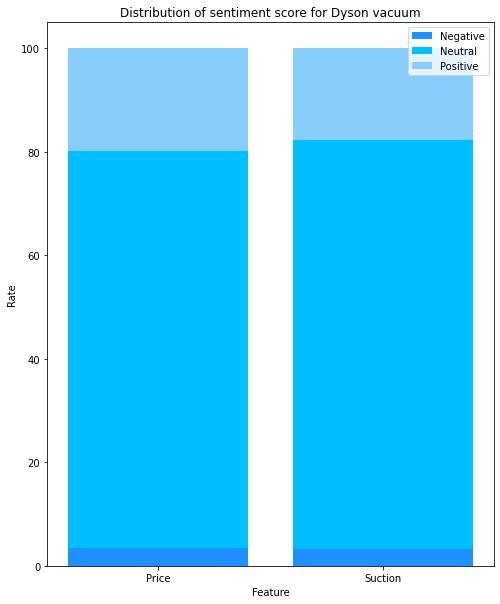

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,10))
plt.bar(df7['Feature'][:2], df7['Negative'][:2]*100, color='dodgerblue')
plt.bar(df7['Feature'][:2], df7['Neutral'][:2]*100, bottom=df7['Negative'][:2]*100 ,color='deepskyblue')
plt.bar(df7['Feature'][:2], df7['Positive'][:2]*100, bottom=df7['Negative'][:2]*100+df7['Neutral'][:2]*100 ,color='lightskyblue')
plt.xlabel("Feature")
plt.ylabel("Rate")
plt.legend(["Negative", "Neutral", "Positive"])
plt.title("Distribution of sentiment score for Dyson vacuum")
plt.show()


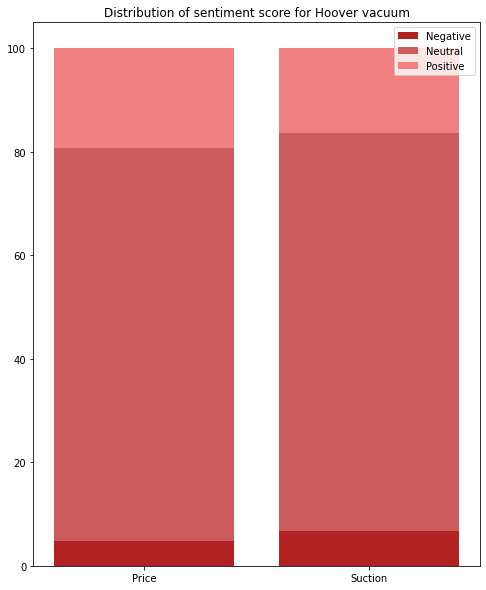

In [51]:
plt.figure(figsize=(8,10))
plt.bar(df7['Feature'][2:], df7['Negative'][2:]*100, color='firebrick')
plt.bar(df7['Feature'][2:], df7['Neutral'][2:]*100, bottom=df7['Negative'][2:]*100 ,color='indianred')
plt.bar(df7['Feature'][2:], df7['Positive'][2:]*100, bottom=df7['Negative'][2:]*100+df7['Neutral'][2:]*100 ,color='lightcoral')
plt.legend(["Negative", "Neutral", "Positive"])
plt.title("Distribution of sentiment score for Hoover vacuum")
plt.show()

**Graph** We can see from the graph that Dyson receive a larger rate of positive scores for Sunction while Hoover has a lower rate of positive score for the same feature. 

In [52]:
#number of reviews in terms of menth, year, date
query2 = """
    SELECT COUNT(Reviews) as count, Date , Month, Year
    FROM reviews_user
    GROUP BY Year, Month, Date
    ORDER BY count DESC 
"""
reviews_by_date = pd.read_sql_query(query2, connection)
reviews_by_date

,count,Date,Month,Year
0,9,23,Mar,2021
1,3,9,Dec,2022
2,3,13,Nov,2022
3,2,2,Dec,2022
4,2,4,Dec,2022
...,...,...,...,...
59,1,28,Oct,2022
60,1,29,Oct,2022
61,1,2,Sep,2022
62,1,14,Sep,2022


`reviews_by_date` shows the number of reviews received in terms of date, month, and year. March 23, 2021 was the date that received most reviews for the 2 vacuums. 

In [53]:
#average 
query3 = """
    SELECT Product, Month, Date, Year, AVG(Ratings) AS average
    FROM review_rating INNER JOIN review_user USING(Reviews)
                       INNER JOIN review_feature USING(Reviews)
    GROUP BY Date, Month, Year
"""
review_rating_time = pd.read_sql_query(query3, connection)
review_rating_time

,Product,Month,Date,Year,average
0,Hoover,Jan,1,2022,4.0
1,Dyson,Dec,2,2022,5.0
2,Hoover,Sep,2,2022,5.0
3,Dyson,Dec,3,2022,5.0
4,Dyson,Dec,4,2022,5.0
5,Hoover,Dec,5,2022,5.0
6,Hoover,Jul,5,2020,5.0
7,Hoover,Nov,5,2022,5.0
8,Dyson,Apr,6,2021,5.0
9,Dyson,Dec,6,2022,5.0


`review_rating_time` table shows the average rating score with respect to date. Most of them are postive ratings.

In [56]:
query4 = """
    SELECT Product, MAX(average), Date, Month, Year
    FROM 
        (SELECT Reviews, Month, Date, Year, AVG(Ratings) AS average
        FROM review_rating as rf INNER JOIN reviews_user as ru USING(Reviews)
        GROUP BY Date, Month, Year) INNER JOIN review_feature USING(Reviews)
    GROUP BY Year, Month
"""
max_rating = pd.read_sql_query(query4, connection)
max_rating

,Product,MAX(average),Date,Month,Year
0,Hoover,5.0,16,Jan,2017
1,Hoover,5.0,18,Dec,2019
2,Hoover,4.0,30,Jun,2019
3,Hoover,5.0,17,Sep,2019
4,Hoover,5.0,14,Jan,2020
5,Hoover,5.0,5,Jul,2020
6,Dyson,5.0,6,Apr,2021
7,Hoover,5.0,21,Aug,2021
8,Dyson,5.0,15,Dec,2021
9,Dyson,5.0,22,Jun,2021


From the `review_rating_time`, we use query to find out which time stamp recevie the highest rating.

In [55]:
query6 = """
SELECT Year, Product, Feature, AVG(Ratings), AVG(Positive_rate) , AVG(Negative_rate), AVG(Neutral_rate)
FROM ((SELECT * FROM reviews_user as ru INNER JOIN review_rating as rt USING (Reviews))
    INNER JOIN (SELECT * FROM review_feature WHERE Feature = 'Price') USING(Reviews))
GROUP BY Year

UNION 

SELECT Year, Product, Feature, AVG(Ratings), AVG(Positive_rate) , AVG(Negative_rate), AVG(Neutral_rate)
FROM ((SELECT * FROM reviews_user as ru INNER JOIN review_rating as rt USING (Reviews))
    INNER JOIN (SELECT * FROM review_feature WHERE Feature = 'Suction') USING(Reviews))
GROUP BY Year
"""
df12 = pd.read_sql_query(query6, connection)
df12

,Year,Product,Feature,AVG(Ratings),AVG(Positive_rate),AVG(Negative_rate),AVG(Neutral_rate)
0,2017,Hoover,Price,5.000000,0.350000,0.000000,0.650000
1,2017,Hoover,Suction,5.000000,0.282000,0.000000,0.718000
2,2019,Hoover,Price,4.500000,0.229250,0.023000,0.747750
3,2019,Hoover,Suction,5.000000,0.155000,0.017000,0.828000
4,2020,Hoover,Price,4.333333,0.226333,0.081000,0.692000
5,2020,Hoover,Suction,5.000000,0.255500,0.104000,0.639500
6,2021,Dyson,Price,4.555556,0.139222,0.044333,0.816333
7,2021,Dyson,Suction,4.666667,0.154133,0.042400,0.803400
8,2022,Dyson,Price,4.173913,0.199609,0.043565,0.756826
9,2022,Dyson,Suction,4.277778,0.164000,0.055778,0.780278


In [56]:
#reviewed question 1
#to compare the average ratings of feature-product pair (Suction) with sentiment scores (UNION 2 table enable comparison and neatness)
query11 = """
SELECT Product, Feature, AVG(Ratings), AVG(Positive_rate), AVG(Negative_rate), AVG(Neutral_rate)
FROM
    (SELECT Reviews, Ratings, Product, Feature, Positive_rate, Negative_rate, Neutral_rate
    FROM (SELECT *
        FROM review_feature
        WHERE Feature = 'Suction') INNER JOIN review_rating USING (Reviews))
GROUP BY Product, Feature
UNION
SELECT Product, Feature, AVG(Ratings), AVG(Positive_rate), AVG(Negative_rate), AVG(Neutral_rate)
FROM
    (SELECT Reviews, Ratings, Product, Feature, Positive_rate, Negative_rate, Neutral_rate
    FROM (SELECT *
        FROM review_feature
        WHERE Feature = 'Price') INNER JOIN review_rating USING (Reviews))
GROUP BY Product, Feature
"""
sent_rating = pd.read_sql_query(query11, connection)
sent_rating

,Product,Feature,AVG(Ratings),AVG(Positive_rate),AVG(Negative_rate),AVG(Neutral_rate)
0,Dyson,Price,4.800000,0.199000,0.034333,0.766600
1,Dyson,Suction,4.950000,0.177750,0.033250,0.789000
2,Hoover,Price,4.040000,0.192200,0.048840,0.758880
3,Hoover,Suction,4.055556,0.163278,0.066667,0.769944


We use UNION instead of joining directly into `review_rating` because in the `reviews_feature` table the PK are the composite of Reviews and Feature. Reviews alone can't identify 1 record. Thus, `Review` can't be used to join `reviews_feature` with `review_rating`.

Overall, the additional information `AVG(Ratings)` so that we can assess the objectivity of the rating system. We can see the rating system is not objective enough since when we analyze the review text, it shows much lower positive sentiment scores and miuch higher neutral scores. 

In [57]:
#reviewed
#to investigate sentiment scores of for each product-feature pairs with respect to rating level of the reviews
#goal is to assess the reliability of the ratings system
query8 = """
    SELECT Ratings, Product, Feature, AVG(Positive_rate), AVG(Negative_rate), AVG(Neutral_rate)
    FROM 
    (SELECT DISTINCT *
    FROM review_rating as rt INNER JOIN
        (SELECT *
        FROM review_feature) AS temp USING (Reviews))
    GROUP BY Ratings, Product, Feature
"""
rating_review_sent = pd.read_sql_query(query8, connection)
rating_review_sent

,Ratings,Product,Feature,AVG(Positive_rate),AVG(Negative_rate),AVG(Neutral_rate)
0,1,Hoover,Price,0.068500,0.038500,0.893500
1,1,Hoover,Suction,0.045000,0.031000,0.925000
2,2,Hoover,Price,0.231000,0.000000,0.769000
3,2,Hoover,Suction,0.231000,0.000000,0.769000
4,3,Dyson,Price,0.098000,0.070000,0.832000
5,3,Hoover,Price,0.102000,0.054333,0.843667
6,3,Hoover,Suction,0.067000,0.108000,0.825000
7,4,Dyson,Price,0.097000,0.040000,0.862000
8,4,Dyson,Suction,0.097000,0.040000,0.862000
9,4,Hoover,Price,0.116286,0.056286,0.827286


We investigate sentiment scores of for each product-feature pairs with respect to rating level of the reviews. The goal is to assess the reliability of the ratings system. Unlike the `sent_rating` table, `rating_review_sent` shows a more detailed level: the average sentiment scores of each level of rating. 

In [58]:
#Close the connection
connection.close()